In [1]:
# Modues to be used
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
import seaborn as sns

# Global variables
MASTER_CSV_PATH = '~/Desktop/csgo-csv/'

In [2]:
## READ DATE FROM MASTER ##

# Read the data from all years
# year_vec = ['2012','2013','2014','2015','2016','2017','2018','2019']

year_vec = ['2019']

# Empty data frames
df_player = pd.DataFrame( { } )
df_team   = pd.DataFrame( { } )

# Append the data from each year
for year in year_vec:
        
    file_name = MASTER_CSV_PATH + year + '-player-lvl.csv'
    df_player = df_player.append( pd.read_csv( file_name ), ignore_index=True, sort=False )
    
    file_name = MASTER_CSV_PATH + year + '-team-lvl.csv'
    df_team   = df_team.append( pd.read_csv( file_name ), ignore_index=True, sort=False )

In [3]:
# Get the win, loss and tie counts for each team

# Create a dictionary which should be faster than manipulating the data frame
team_dic = {}
for team_id in df_team.team_id.unique():

    team_dic[team_id] = {}
    team_dic[team_id]['win']  =  0
    team_dic[team_id]['loss'] =  0
    team_dic[team_id]['tie']  =  0

    team_dic[team_id]['total_matches']  =  0

    team_dic[team_id]['ADR']     = float( 0.0 )
    team_dic[team_id]['deaths']  = float( 0.0 )

    team_dic[team_id]['ADR_std']     = float( 0.0 )
    team_dic[team_id]['deaths_std']  = float( 0.0 )


# Go through each map_id
for map_id in df_team.map_id.unique():

    df_tmp  = df_team[ df_team['map_id']==map_id ]

    team_1  = df_tmp['team_id'].values[0]
    score_1 = df_tmp['team_score'].values[0]

    team_2  = df_tmp['team_id'].values[1]
    score_2 = df_tmp['team_score'].values[1]

    if score_1 > score_2:
        team_dic[team_1]['win']  = team_dic[team_1]['win'] + 1
        team_dic[team_2]['loss'] = team_dic[team_2]['loss'] + 1
    elif score_1 < score_2:
        team_dic[team_2]['win']  = team_dic[team_2]['win'] + 1
        team_dic[team_1]['loss'] = team_dic[team_1]['loss'] + 1
    else:
        team_dic[team_1]['tie'] = team_dic[team_1]['tie'] + 1
        team_dic[team_2]['tie'] = team_dic[team_2]['tie'] + 1

    # Get the stats of the team
    team_dic[team_1]['ADR'] = team_dic[team_1]['ADR'] + np.average( df_player[ (df_player['team_id']==team_1) & (df_player['map_id']==map_id) ]['ADR'].values )
    team_dic[team_2]['ADR'] = team_dic[team_2]['ADR'] + np.average( df_player[ (df_player['team_id']==team_2) & (df_player['map_id']==map_id) ]['ADR'].values )

    team_dic[team_1]['deaths'] = team_dic[team_1]['deaths'] + np.average( df_player[ (df_player['team_id']==team_1) & (df_player['map_id']==map_id) ]['deaths'].values )
    team_dic[team_2]['deaths'] = team_dic[team_2]['deaths'] + np.average( df_player[ (df_player['team_id']==team_2) & (df_player['map_id']==map_id) ]['deaths'].values )

    team_dic[team_1]['ADR_std'] = team_dic[team_1]['ADR_std'] + np.std( df_player[ (df_player['team_id']==team_1) & (df_player['map_id']==map_id) ]['ADR'].values )
    team_dic[team_2]['ADR_std'] = team_dic[team_2]['ADR_std'] + np.std( df_player[ (df_player['team_id']==team_2) & (df_player['map_id']==map_id) ]['ADR'].values )

    team_dic[team_1]['deaths_std'] = team_dic[team_1]['deaths_std'] + np.std( df_player[ (df_player['team_id']==team_1) & (df_player['map_id']==map_id) ]['deaths'].values )
    team_dic[team_2]['deaths_std'] = team_dic[team_2]['deaths_std'] + np.std( df_player[ (df_player['team_id']==team_2) & (df_player['map_id']==map_id) ]['deaths'].values )
    # print( np.average( df_player[ (df_player['team_id']==team_2) & (df_player['map_id']==map_id) ]['ADR'].values ) )


# Normalize the stats
for team_id in df_team.team_id.unique():
    tot_matches = team_dic[team_id]['win'] + team_dic[team_id]['loss'] + team_dic[team_id]['tie']

    team_dic[team_id]['total_matches'] = tot_matches

    if tot_matches!=0:
        team_dic[team_id]['win']  = team_dic[team_id]['win'] / float( tot_matches ) 
        team_dic[team_id]['loss'] = team_dic[team_id]['loss'] / float( tot_matches ) 
        team_dic[team_id]['tie']  = team_dic[team_id]['tie'] / float( tot_matches ) 

        team_dic[team_id]['ADR']    = team_dic[team_id]['ADR'] / float( tot_matches )
        team_dic[team_id]['deaths'] = team_dic[team_id]['deaths'] / float( tot_matches )

        team_dic[team_id]['ADR_std']    = team_dic[team_id]['ADR_std'] / float( tot_matches )
        team_dic[team_id]['deaths_std'] = team_dic[team_id]['deaths_std'] / float( tot_matches ) 

In [6]:
data = pd.DataFrame.from_dict(team_dic,orient='index')
data.head()

,win,loss,tie,total_matches,ADR,deaths,ADR_std,deaths_std
4411,0.467391,0.521739,0.01087,184,73.498478,17.685870,14.397368,1.621891
4468,0.333333,0.666667,0.00000,15,72.381333,19.493333,14.066887,1.578753
4469,0.285714,0.714286,0.00000,7,70.114286,17.714286,13.247972,1.988749
4485,0.500000,0.500000,0.00000,12,73.541667,18.783333,15.226113,2.239395
4488,0.500000,0.500000,0.00000,4,73.910000,17.900000,11.434607,1.756287


In [4]:
team_dic

'deaths': 19.0,
  'ADR_std': 6.768769913649359,
  'deaths_std': 0.9797958971132712},
 4639: {'win': 0.42857142857142855,
  'loss': 0.5714285714285714,
  'tie': 0.0,
  'total_matches': 7,
  'ADR': 71.9657142857143,
  'deaths': 18.82857142857143,
  'ADR_std': 11.068216494631383,
  'deaths_std': 1.4591848644168621},
 9736: {'win': 0.0,
  'loss': 1.0,
  'tie': 0.0,
  'total_matches': 2,
  'ADR': 68.9,
  'deaths': 21.0,
  'ADR_std': 14.445178699519781,
  'deaths_std': 2.930788651183405},
 9798: {'win': 0.0,
  'loss': 1.0,
  'tie': 0.0,
  'total_matches': 2,
  'ADR': 73.68,
  'deaths': 26.7,
  'ADR_std': 8.72277539981351,
  'deaths_std': 2.694438717061496},
 9796: {'win': 0.3333333333333333,
  'loss': 0.6666666666666666,
  'tie': 0.0,
  'total_matches': 3,
  'ADR': 74.58666666666666,
  'deaths': 19.866666666666667,
  'ADR_std': 13.902074701084459,
  'deaths_std': 3.2173269530778583},
 9151: {'win': 0.0,
  'loss': 1.0,
  'tie': 0.0,
  'total_matches': 2,
  'ADR': 67.0,
  'deaths': 20.70000000

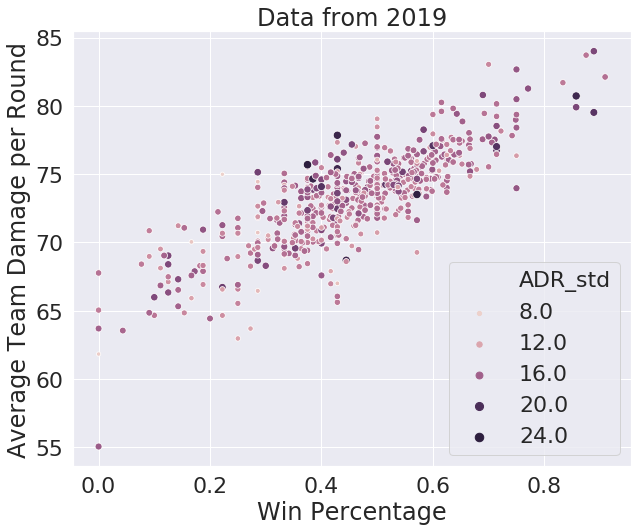

In [7]:
sns.set_style("whitegrid")
sns.set(font_scale=2)
#sns.set_palette("pastel")

data_tmp = data[ data['total_matches']>6 ]
plt.figure(figsize=(10,8))
# ax1 = sns.scatterplot(data=data_tmp,x='win',y='ADR')

sns.scatterplot(data=data_tmp,x='win',y='ADR',size='ADR_std',hue='ADR_std')
plt.title('Data from 2019');
plt.xlabel('Win Percentage');
plt.ylabel('Average Team Damage per Round');

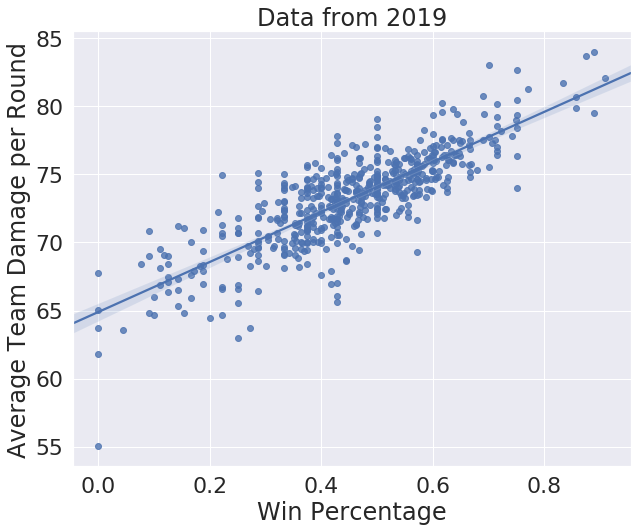

In [168]:
sns.set_style("whitegrid")
sns.set(font_scale=2)
#sns.set_palette("pastel")

data_tmp = data[ data['total_matches']>6 ]
plt.figure(figsize=(10,8))
# ax1 = sns.scatterplot(data=data_tmp,x='win',y='ADR')

sns.regplot(data=data_tmp,x='win',y='ADR')
plt.title('Data from 2019');
plt.xlabel('Win Percentage');
plt.ylabel('Average Team Damage per Round');

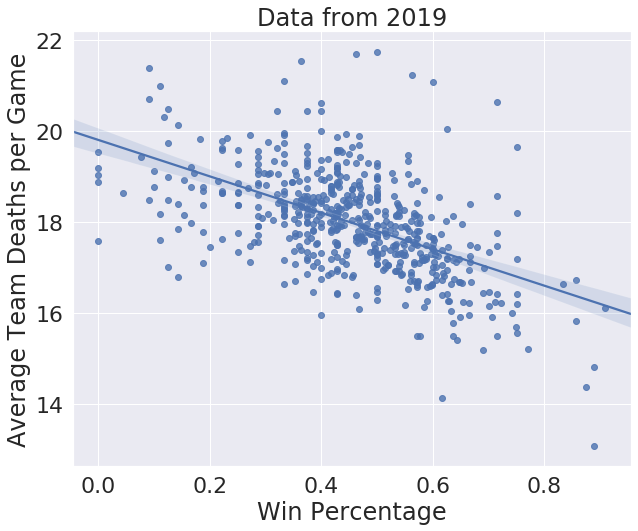

In [169]:


data_tmp = data[ data['total_matches']>6 ]
plt.figure(figsize=(10,8))
#ax1 = sns.scatterplot(data=data_tmp,x='win',y='deaths')

sns.regplot(data=data_tmp,x='win',y='deaths')
plt.title('Data from 2019');
plt.xlabel('Win Percentage');
plt.ylabel('Average Team Deaths per Game');

In [8]:
# For this year, plot how does the win rate relates to some of the features
print( 'Number of teams = ', len(df_team.team_id.unique()) )

# Plot how does the win rate relate to the average ADR of a team


Number of teams =  1244


In [12]:
df_player[ df_player['player_name']=='Xyp9x' ]

,map_id,map,date,team_id,team_name,player_id,player_name,kills,hs_kills,assists,flash_assists,deaths,KAST,kill_death_diff,ADR,first_kills_diff,rating,kills_per_round,deaths_per_round,impact
1528,81670,nuke,1550674500000,6665,Astralis,4954,Xyp9x,26,10,0,0,8,90.9,18,131.1,1,2.05,1.18,0.36,1.79
2323,82558,d2,1552316700000,6665,Astralis,4954,Xyp9x,20,12,9,0,12,82.6,8,97.4,1,1.50,0.87,0.52,1.72
2326,82561,nuke,1552316700000,6665,Astralis,4954,Xyp9x,19,6,3,1,8,85.0,11,88.0,-1,1.65,0.95,0.40,1.74
2531,82794,trn,1552586700000,6665,Astralis,4954,Xyp9x,21,6,6,0,13,68.0,8,100.4,2,1.49,0.84,0.52,1.72
2921,83274,d2,1553363400000,6665,Astralis,4954,Xyp9x,26,8,11,6,19,82.8,7,91.7,2,1.35,0.90,0.66,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137686,96071,inf,1575376500000,6665,Astralis,4954,Xyp9x,12,4,6,3,12,75.0,0,52.3,-1,0.98,0.50,0.50,0.73
137907,96321,d2,1575745800000,6665,Astralis,4954,Xyp9x,9,3,8,4,21,56.7,-12,46.1,0,0.64,0.30,0.70,0.50
140944,82121,ovp,1551550800000,6665,Astralis,4954,Xyp9x,15,6,7,2,19,73.3,-4,56.6,-3,0.85,0.50,0.63,0.51
145612,87457,nuke,1559913600000,6665,Astralis,4954,Xyp9x,14,7,5,0,20,72.4,-6,60.3,-3,0.80,0.48,0.69,0.41
